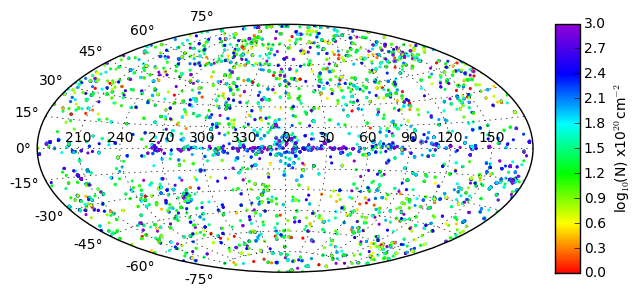

In [64]:
import numpy as np
from pylab import *
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import LinearSegmentedColormap
from scipy.interpolate import griddata
#from mpl_toolkits.axes_grid1 import make_axes_locatable
#%matplotlib inline

log10=np.log10

def plot_mwd(RA1,Dec1,org=0,title='Aitoff projection', projection='aitoff',size_array=1	,levels=1):
    ''' RA,RA1,Dec1,Dec2 are arrays of the same length.
    RA takes values in [0,360), Dec in [-90,90],
    which represent angles in degrees.
    org is the origin of the plot, 0 or a multiple of 30 degrees in [0,360).
    title is the title of the figure.
    projection is the kind of projection: 'mollweide', 'aitoff', 'hammer', 'lambert'
    '''
    x1 = np.remainder(RA1+360-org,360) # shift RA1 values
 
    for i in range(0,len(x1)):
        if(x1[i]>180.):
            x1[i]=x1[i]-360.

        tick_labels = np.array([210, 240, 270, 300, 330, 0, 30, 60, 90, 120, 150])
      
    #INTERPOLATION
    x_tmp=np.radians(x1)
    y_tmp=np.radians(Dec1)
    grid_size_low_x=-180;grid_size_high_x=180.
    grid_size_low_y=-120;grid_size_high_y=120.

    #Create uniform grid
    CS=plt.scatter(x_tmp,y_tmp,marker='o',c=nn,s=5,cmap=cm_mine, edgecolors='none',norm = mpl.colors.Normalize(vmin=1., vmax=2.5)) 

    ax.set_xticklabels(tick_labels)     # we add the scale on the x axis
    ax.set_title(title)
    ax.title.set_fontsize(10)
    ax.set_xlabel("")
    ax.xaxis.label.set_fontsize(10)
    ax.set_ylabel("")
    ax.yaxis.label.set_fontsize(10)
    ax.grid(True)

    
    norm = mpl.colors.Normalize(vmin=0, vmax=3)
    m = cm.ScalarMappable(cmap=cm_mine, norm=norm)
    m.set_array([])
    #divider = make_axes_locatable(ax)
 
    cbar = plt.colorbar(m, fraction=0.046, pad=0.04,aspect=10)
    cbar.set_label('log$_{10}$(N) x10$^{20} $cm$^{-2}$', labelpad=5, fontsize=10)
    

#ALL SOURCES
filename='/Users/javier/CSC/plots/csc_big_nh.out'
l_tmp,b_tmp,nn_tmp = np.loadtxt(filename,unpack=True,skiprows=16,usecols=[8,9,18])
#nn_tmp=nn_tmp/1e22
 
tt=log10(nn_tmp)
  
    
colors = [(1, 0, 0),(1, 1, 0), (0, 1, 0), (0, 1, 1), (0, 0, 1), (0.58, 0, 0.84)]  # R -> Y -> G -> Cyan -> B

cmap_name = 'my_list'
cm_mine = LinearSegmentedColormap.from_list(cmap_name, colors, N=300)  
size_array=1
levels=40
fig = figure(figsize=(7, 4))
plt.subplots_adjust(left=None, bottom=0.1, right=None, top=0.9, wspace=None, hspace=None)

ax = fig.add_subplot(111, projection='aitoff', axisbg ='white')
l_data=[]
b_data=[]
nn=[]
for i in range(0,len(l_tmp)):
	l_data.append(l_tmp[i])
	b_data.append(b_tmp[i])
	nn.append(log10(nn_tmp[i]))


coord1= zip(l_data,b_data)
coord1=np.array(coord1)
plot1 = plot_mwd(coord1[:,0],coord1[:,1], org=0, title ='',size_array=size_array,levels=levels)

plt.savefig('galactic_nH.pdf') 

In [63]:
plt.savefig('galactic_nH.pdf') 